In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df = pd.read_csv("수출 주요 국가 차량 판매량 순위_정리 완료.csv")

In [4]:
df

,연도,국가명,모델명,판매량
0,2023,Africa,Toyota Hilux,37382
1,2023,Africa,Ford Ranger,24618
2,2023,Africa,Volkswagen Polo Vivo,23904
3,2023,Africa,Toyota Corolla Cross,22592
4,2023,Africa,Isuzu D-Max,18963
...,...,...,...,...
155,2025,Middle East,Nissan Patrol,22400
156,2025,Middle East,Nissan Sunny,21900
157,2025,Middle East,Toyota Hilux,19915
158,2025,Middle East,Toyota Land Cruiser,12530


In [6]:
df["모델명"].nunique()

68

In [14]:
# 차량 정보 딕셔너리 생성 (전 차량 포함)
vehicle_info = {
    'Toyota Hilux': {'차량 구분': '픽업', '브랜드': 'Toyota', '파워트레인': '내연기관'},
    'Ford Ranger': {'차량 구분': '픽업', '브랜드': 'Ford', '파워트레인': '내연기관'},
    'Volkswagen Polo Vivo': {'차량 구분': '컴팩트', '브랜드': 'Volkswagen', '파워트레인': '내연기관'},
    'Toyota Corolla Cross': {'차량 구분': 'SUV', '브랜드': 'Toyota', '파워트레인': '하이브리드'},
    'Isuzu D-Max': {'차량 구분': '픽업', '브랜드': 'Isuzu', '파워트레인': '내연기관'},
    'Perodua Myvi': {'차량 구분': '해치백', '브랜드': 'Perodua', '파워트레인': '내연기관'},
    'Honda City': {'차량 구분': '세단', '브랜드': 'Honda', '파워트레인': '내연기관'},
    'Honda HR-V': {'차량 구분': 'SUV', '브랜드': 'Honda', '파워트레인': '하이브리드'},
    'Ford F-Series': {'차량 구분': '픽업', '브랜드': 'Ford', '파워트레인': '내연기관'},
    'Ram Pickup': {'차량 구분': '픽업', '브랜드': 'Ram', '파워트레인': '내연기관'},
    'Toyota RAV4': {'차량 구분': 'SUV', '브랜드': 'Toyota', '파워트레인': '하이브리드'},
    'GMC Sierra': {'차량 구분': '픽업', '브랜드': 'GMC', '파워트레인': '내연기관'},
    'Chevrolet Silverado': {'차량 구분': '픽업', '브랜드': 'Chevrolet', '파워트레인': '내연기관'},
    'Tesla Model Y': {'차량 구분': 'SUV', '브랜드': 'Tesla', '파워트레인': '전기차'},
    'BYD Qin Plus': {'차량 구분': '세단', '브랜드': 'BYD', '파워트레인': '하이브리드'},
    'BYD Song Plus': {'차량 구분': 'SUV', '브랜드': 'BYD', '파워트레인': '하이브리드'},
    'Nissan Sylphy': {'차량 구분': '세단', '브랜드': 'Nissan', '파워트레인': '내연기관'},
    'Volkswagen Lavida': {'차량 구분': '세단', '브랜드': 'Volkswagen', '파워트레인': '내연기관'},
    'Dacia Sandero': {'차량 구분': '해치백', '브랜드': 'Dacia', '파워트레인': '내연기관'},
    'Volkswagen T-Roc': {'차량 구분': 'SUV', '브랜드': 'Volkswagen', '파워트레인': '내연기관'},
    'Renault Clio': {'차량 구분': '해치백', '브랜드': 'Renault', '파워트레인': '내연기관'},
    'Peugeot 208': {'차량 구분': '해치백', '브랜드': 'Peugeot', '파워트레인': '내연기관'},
    'Opel Corsa': {'차량 구분': '해치백', '브랜드': 'Opel', '파워트레인': '내연기관'},
    'Maruti Suzuki Swift': {'차량 구분': '해치백', '브랜드': 'Maruti Suzuki', '파워트레인': '내연기관'},
    'Maruti Suzuki WagonR': {'차량 구분': '해치백', '브랜드': 'Maruti Suzuki', '파워트레인': '내연기관'},
    'Maruti Suzuki Baleno': {'차량 구분': '해치백', '브랜드': 'Maruti Suzuki', '파워트레인': '내연기관'},
    'Maruti Suzuki Vitara (Grand Vitara)': {'차량 구분': 'SUV', '브랜드': 'Maruti Suzuki', '파워트레인': '하이브리드'},
    'Tata Nexon': {'차량 구분': 'SUV', '브랜드': 'Tata', '파워트레인': '하이브리드'},
    'Chevrolet Onix': {'차량 구분': '세단', '브랜드': 'Chevrolet', '파워트레인': '내연기관'},
    'Fiat Strada': {'차량 구분': '픽업', '브랜드': 'Fiat', '파워트레인': '내연기관'},
    'Volkswagen Polo': {'차량 구분': '해치백', '브랜드': 'Volkswagen', '파워트레인': '내연기관'},
    'Hyundai HB20': {'차량 구분': '해치백', '브랜드': 'Hyundai', '파워트레인': '내연기관'},
    'Nissan Versa': {'차량 구분': '세단', '브랜드': 'Nissan', '파워트레인': '내연기관'},
    'Nissan NP300': {'차량 구분': '픽업', '브랜드': 'Nissan', '파워트레인': '내연기관'},
    'Chevrolet Aveo': {'차량 구분': '세단', '브랜드': 'Chevrolet', '파워트레인': '내연기관'},
    'Kia Rio': {'차량 구분': '컴팩트', '브랜드': 'Kia', '파워트레인': '내연기관'},
    'MG 5': {'차량 구분': '세단', '브랜드': 'MG', '파워트레인': '하이브리드'},
    'Toyota Yaris Sedan': {'차량 구분': '세단', '브랜드': 'Toyota', '파워트레인': '내연기관'},
    'Nissan Sunny': {'차량 구분': '세단', '브랜드': 'Nissan', '파워트레인': '내연기관'},
    'Hyundai Accent': {'차량 구분': '세단', '브랜드': 'Hyundai', '파워트레인': '내연기관'},
    'Nissan Patrol': {'차량 구분': 'SUV', '브랜드': 'Nissan', '파워트레인': '내연기관'},
    'Ram 1500': {'차량 구분': '픽업', '브랜드': 'Ram', '파워트레인': '내연기관'},
    'Toyota Vios': {'차량 구분': '세단', '브랜드': 'Toyota', '파워트레인': '내연기관'},
    'Ram 1500/Heavy Duty': {'차량 구분': '픽업', '브랜드': 'Ram', '파워트레인': '내연기관'},
    'Honda CR-V': {'차량 구분': 'SUV', '브랜드': 'Honda', '파워트레인': '하이브리드'},
    'Volkswagen Golf': {'차량 구분': '해치백', '브랜드': 'Volkswagen', '파워트레인': '내연기관'},
    'Tata Punch': {'차량 구분': 'SUV', '브랜드': 'Tata', '파워트레인': '내연기관'},
    'Maruti Suzuki Ertiga': {'차량 구분': 'MPV', '브랜드': 'Maruti Suzuki', '파워트레인': '내연기관'},
    'Maruti Suzuki Brezza': {'차량 구분': 'SUV', '브랜드': 'Maruti Suzuki', '파워트레인': '내연기관'},
    'Hyundai Creta': {'차량 구분': 'SUV', '브랜드': 'Hyundai', '파워트레인': '하이브리드'},
    'Kia K3': {'차량 구분': '세단', '브랜드': 'Kia', '파워트레인': '내연기관'},
    'Volkswagen Virtus': {'차량 구분': '세단', '브랜드': 'Volkswagen', '파워트레인': '내연기관'},
    'Toyota Land Cruiser': {'차량 구분': 'SUV', '브랜드': 'Toyota', '파워트레인': '내연기관'},
    'Tesla Model 3': {'차량 구분': '세단', '브랜드': 'Tesla', '파워트레인': '전기차'},
    'Chevrolet Silverado 1500': {'차량 구분': '픽업', '브랜드': 'Chevrolet', '파워트레인': '내연기관'},
    'Suzuki Swift': {'차량 구분': '해치백', '브랜드': 'Suzuki', '파워트레인': '내연기관'},
    'Dacia Duster': {'차량 구분': 'SUV', '브랜드': 'Dacia', '파워트레인': '내연기관'},
    'Toyota Yaris': {'차량 구분': '해치백', '브랜드': 'Toyota', '파워트레인': '내연기관'},
    'Jeep Renegade': {'차량 구분': 'SUV', '브랜드': 'Jeep', '파워트레인': '내연기관'},
    'MG5': {'차량 구분': '세단', '브랜드': 'MG', '파워트레인': '하이브리드'},
    'Toyota Corolla': {'차량 구분': '세단', '브랜드': 'Toyota', '파워트레인': '내연기관'},
    'BYD Song PLUS DM': {'차량 구분': 'SUV', '브랜드': 'BYD', '파워트레인': '하이브리드'},
    'Changan CS75': {'차량 구분': 'SUV', '브랜드': 'Changan', '파워트레인': '하이브리드'},
    'Geely Xingyue L': {'차량 구분': 'SUV', '브랜드': 'Geely', '파워트레인': '하이브리드'},
    'Geely Xingyuan': {'차량 구분': 'SUV', '브랜드': 'Geely', '파워트레인': '하이브리드'},
    'Chevrolet Equinox': {'차량 구분': 'SUV', '브랜드': 'Chevrolet', '파워트레인': '하이브리드'},
    'Nissan Kicks': {'차량 구분': 'SUV', '브랜드': 'Nissan', '파워트레인': '하이브리드'}
}


In [16]:
# 데이터프레임에 차량 정보를 매핑하여 열 추가
df['차량 구분'] = df['모델명'].map(
    lambda x: vehicle_info[x]['차량 구분'] if x in vehicle_info else '정보 없음'
)
df['브랜드'] = df['모델명'].map(
    lambda x: vehicle_info[x]['브랜드'] if x in vehicle_info else '정보 없음'
)
df['파워트레인'] = df['모델명'].map(
    lambda x: vehicle_info[x]['파워트레인'] if x in vehicle_info else '정보 없음'
)


In [17]:
df

,연도,국가명,모델명,판매량,차량 구분,브랜드,파워트레인
0,2023,Africa,Toyota Hilux,37382,픽업,Toyota,내연기관
1,2023,Africa,Ford Ranger,24618,픽업,Ford,내연기관
2,2023,Africa,Volkswagen Polo Vivo,23904,컴팩트,Volkswagen,내연기관
3,2023,Africa,Toyota Corolla Cross,22592,SUV,Toyota,하이브리드
4,2023,Africa,Isuzu D-Max,18963,픽업,Isuzu,내연기관
...,...,...,...,...,...,...,...
155,2025,Middle East,Nissan Patrol,22400,SUV,Nissan,내연기관
156,2025,Middle East,Nissan Sunny,21900,세단,Nissan,내연기관
157,2025,Middle East,Toyota Hilux,19915,픽업,Toyota,내연기관
158,2025,Middle East,Toyota Land Cruiser,12530,SUV,Toyota,내연기관


In [18]:
df.to_csv("수출 주요 국가 차량 판매량 순위_정리 완료2.csv", index=False)

In [19]:
df

,연도,국가명,모델명,판매량,차량 구분,브랜드,파워트레인
0,2023,Africa,Toyota Hilux,37382,픽업,Toyota,내연기관
1,2023,Africa,Ford Ranger,24618,픽업,Ford,내연기관
2,2023,Africa,Volkswagen Polo Vivo,23904,컴팩트,Volkswagen,내연기관
3,2023,Africa,Toyota Corolla Cross,22592,SUV,Toyota,하이브리드
4,2023,Africa,Isuzu D-Max,18963,픽업,Isuzu,내연기관
...,...,...,...,...,...,...,...
155,2025,Middle East,Nissan Patrol,22400,SUV,Nissan,내연기관
156,2025,Middle East,Nissan Sunny,21900,세단,Nissan,내연기관
157,2025,Middle East,Toyota Hilux,19915,픽업,Toyota,내연기관
158,2025,Middle East,Toyota Land Cruiser,12530,SUV,Toyota,내연기관


In [20]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

In [21]:
data = df

In [22]:
data

,연도,국가명,모델명,판매량,차량 구분,브랜드,파워트레인
0,2023,Africa,Toyota Hilux,37382,픽업,Toyota,내연기관
1,2023,Africa,Ford Ranger,24618,픽업,Ford,내연기관
2,2023,Africa,Volkswagen Polo Vivo,23904,컴팩트,Volkswagen,내연기관
3,2023,Africa,Toyota Corolla Cross,22592,SUV,Toyota,하이브리드
4,2023,Africa,Isuzu D-Max,18963,픽업,Isuzu,내연기관
...,...,...,...,...,...,...,...
155,2025,Middle East,Nissan Patrol,22400,SUV,Nissan,내연기관
156,2025,Middle East,Nissan Sunny,21900,세단,Nissan,내연기관
157,2025,Middle East,Toyota Hilux,19915,픽업,Toyota,내연기관
158,2025,Middle East,Toyota Land Cruiser,12530,SUV,Toyota,내연기관


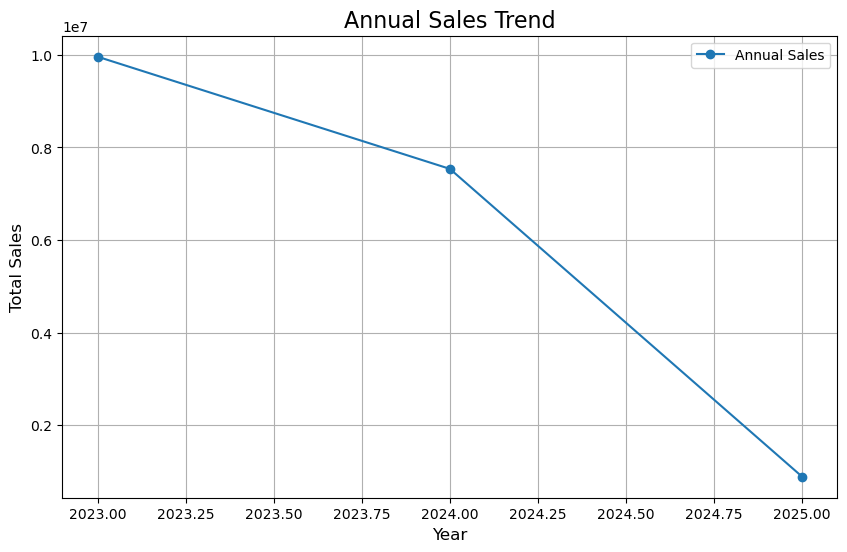

In [43]:
# 1. 연도별 판매량 추이 (Annual Sales Trend)
yearly_sales = data.groupby('연도')['판매량'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', label='Annual Sales')
plt.title('Annual Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

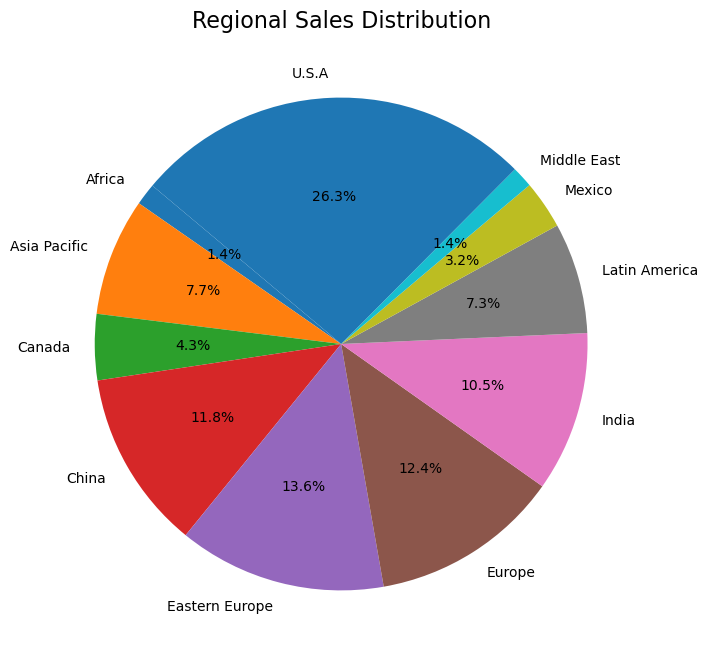

In [44]:
# 2. 지역별 판매 비중 (Regional Sales Distribution)
regional_sales = data.groupby('국가명')['판매량'].sum()
plt.figure(figsize=(10, 8))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution', fontsize=16)
plt.show()

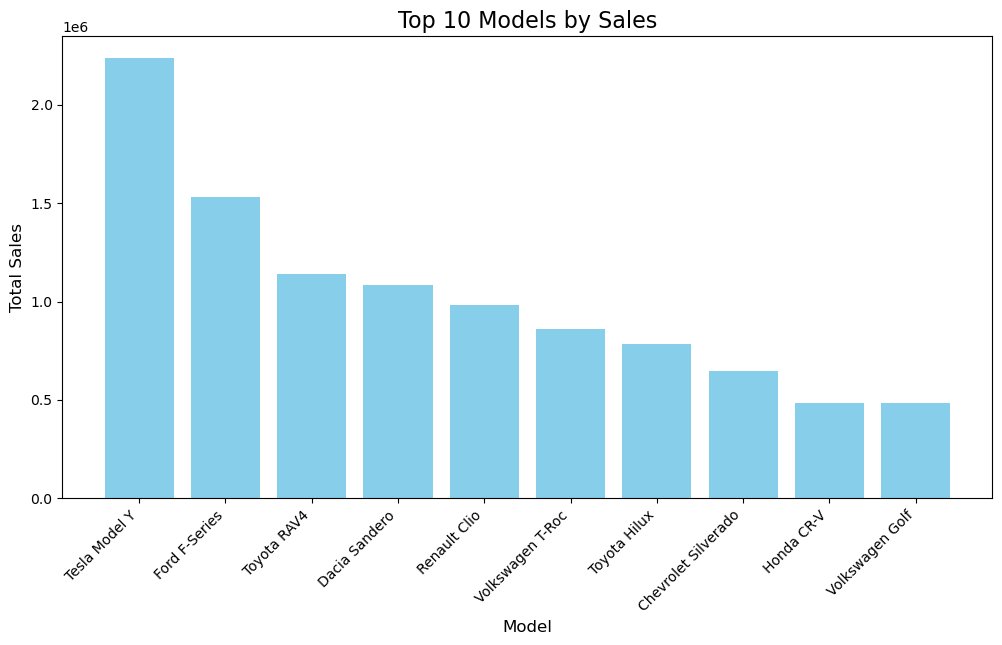

In [45]:
# 3. 모델별 판매량 비교 (Top 10 Models by Sales)
model_sales = data.groupby('모델명')['판매량'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(model_sales.index, model_sales.values, color='skyblue')
plt.title('Top 10 Models by Sales', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


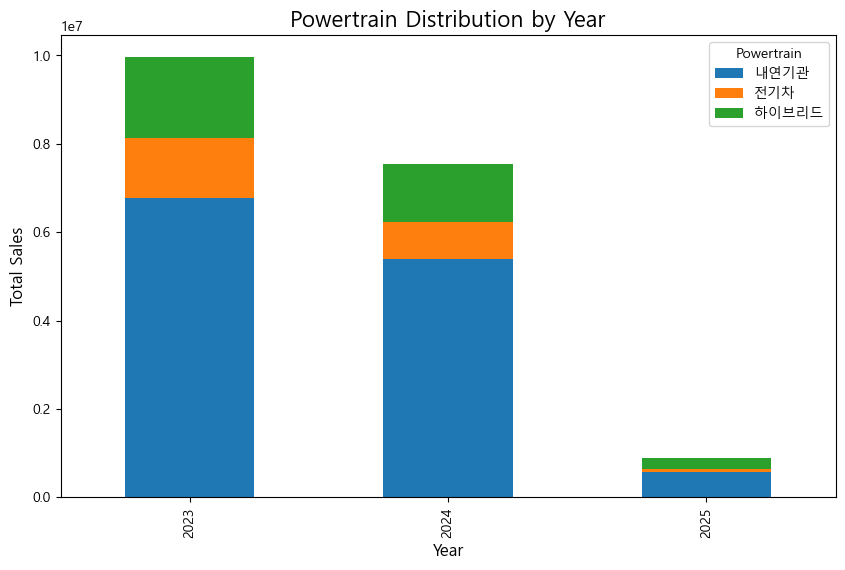

In [48]:
# 4. 파워트레인 비중 분석 (Powertrain Distribution by Year)
powertrain_sales = data.groupby(['연도', '파워트레인'])['판매량'].sum().unstack()
plt.figure(figsize=(10, 6))
powertrain_sales.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Powertrain Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Powertrain', fontsize=10)
plt.show()


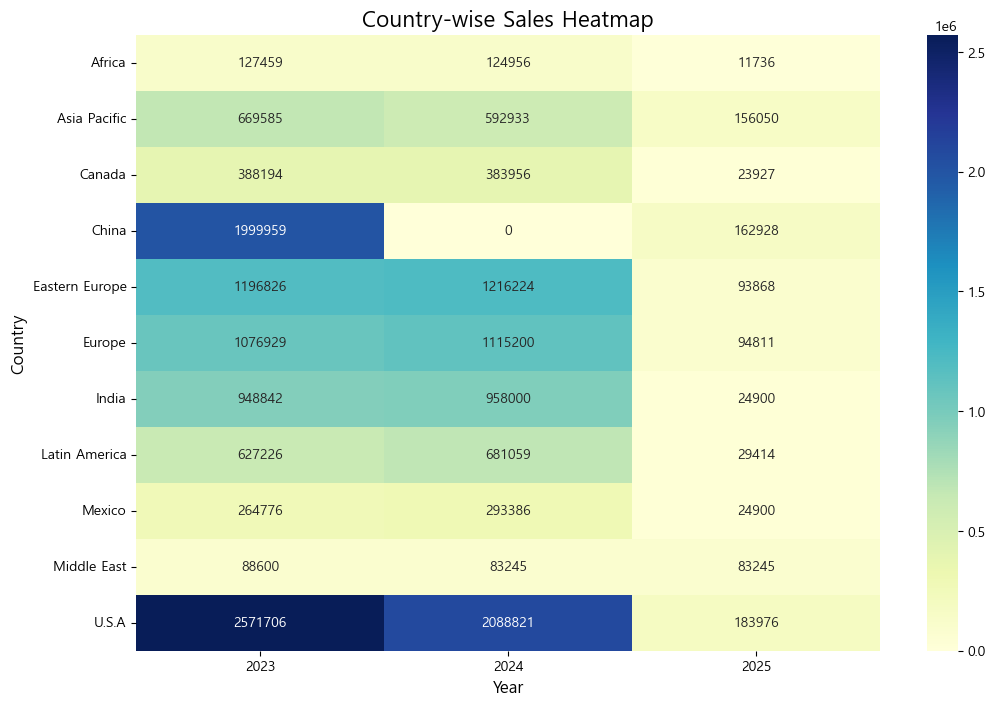

In [49]:
# 5. 국가별 판매량 히트맵 (Country-wise Sales Heatmap)
heatmap_data = data.pivot_table(index='국가명', columns='연도', values='판매량', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Country-wise Sales Heatmap', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

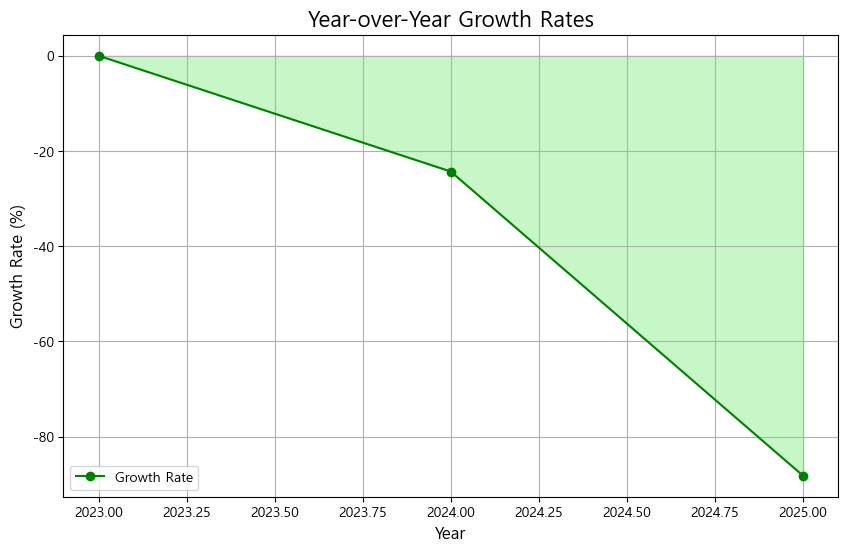

In [57]:
# 6. 성장률 비교 (Year-over-Year Growth Rates)
growth_rates = yearly_sales.pct_change().fillna(0) * 100
plt.figure(figsize=(10, 6))
plt.fill_between(growth_rates.index, growth_rates.values, color='lightgreen', alpha=0.5)
plt.plot(growth_rates.index, growth_rates.values, marker='o', color='green', label='Growth Rate')
plt.title('Year-over-Year Growth Rates', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [58]:
# 7. 경쟁사 비교 (Competitor Comparison by Region - Radar Chart)
competitor_data = {
    'Region': ['U.S.A', 'Europe', 'China', 'India', 'Latin America'],
    'Hyundai/Kia': [30, 25, 20, 15, 10],
    'Toyota': [35, 30, 25, 20, 15],
    'Tesla': [25, 20, 35, 10, 5]
}

In [59]:
competitor_df = pd.DataFrame(competitor_data)

In [60]:
categories = competitor_df['Region']
n = len(categories)
angles = [i / float(n) * 2 * pi for i in range(n)]
angles += angles[:1]

In [61]:
# Radar Chart Plot
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

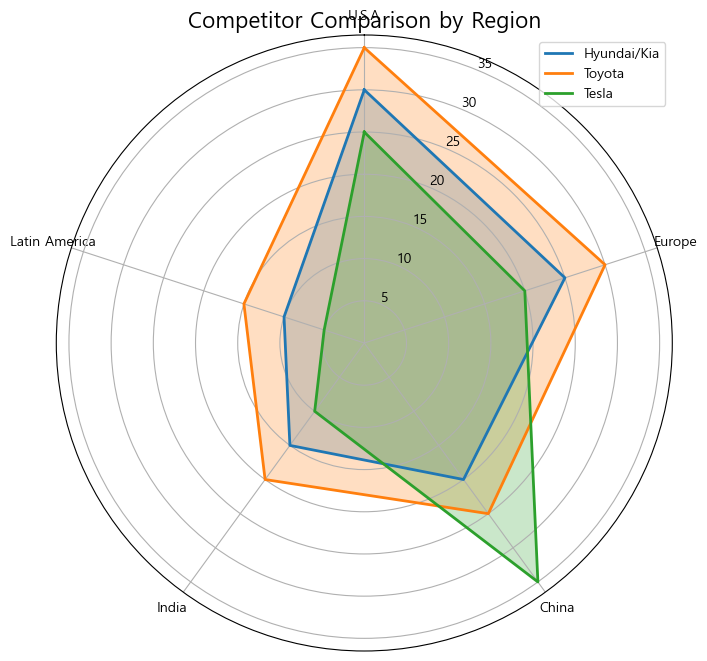

In [62]:
for brand in ['Hyundai/Kia', 'Toyota', 'Tesla']:
    values = competitor_df[brand].tolist() + competitor_df[brand].tolist()[:1]
    ax.plot(angles, values, label=f'{brand}', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Competitor Comparison by Region', fontsize=16)
ax.legend(loc='upper right')
plt.show()


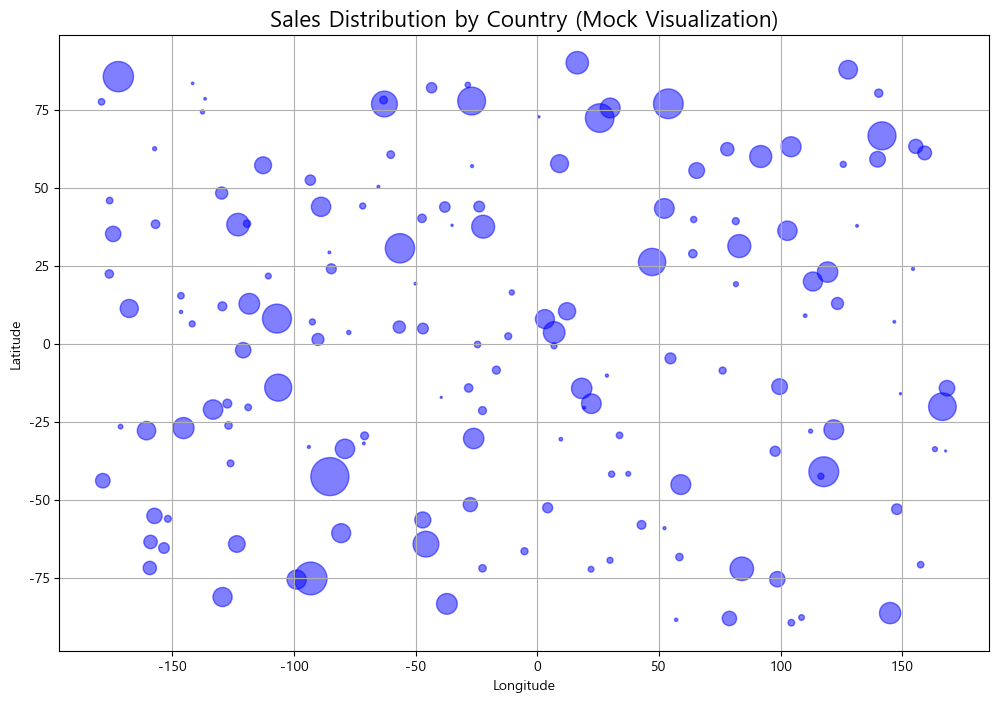

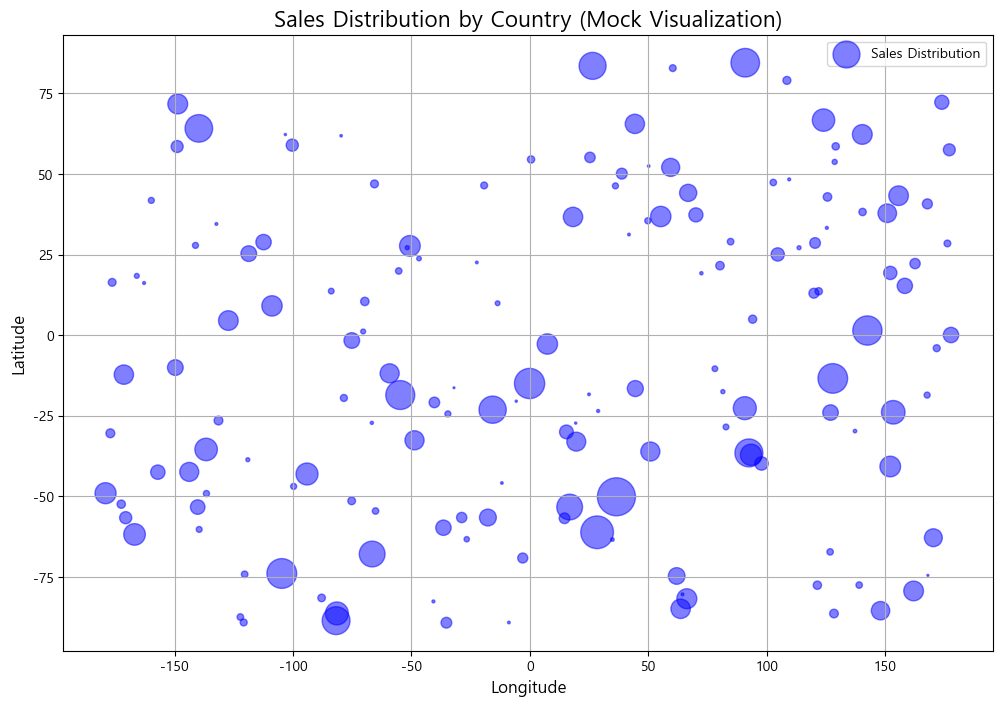

In [64]:
# Mock 데이터 생성: 위도와 경도 추가
latitudes = np.random.uniform(-90, 90, size=len(data))
longitudes = np.random.uniform(-180, 180, size=len(data))
data['Latitude'] = latitudes
data['Longitude'] = longitudes

# 지도 시각화: 산점도 플롯 생성
plt.figure(figsize=(12, 8))
plt.scatter(data['Longitude'], data['Latitude'], s=data['판매량'] / 1000,
            alpha=0.5, c='blue', label='Sales Distribution')
plt.title("Sales Distribution by Country (Mock Visualization)", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()